In [49]:
import pandas as pd

df = pd.read_csv('raeresek.csv')
df.head(8)

,Datum,Muszak,Kinga,Kata,Reka,Hanna,Kitti,Zsofi,Evi,Panni,Marcsi,Balazs,Peti,Adam
0,1-Apr,De,1000,0,1000,1000,1000,0,1000,1000,1000,1000,1000,1000
1,1-Apr,Du,1000,1,1,1000,1000,0,1,0,1000,1000,1000,1000
2,1-Apr,Na,1000,0,1000,1000,1000,1,0,1000,1000,1000,1000,1000
3,1-Apr,E,1000,0,1000,1000,1000,1000,1000,1000,1000,0,1000,1000
4,2-Apr,De,1000,0,0,1000,1000,0,0,1000,1000,1000,1000,1000
5,2-Apr,Du,1000,1,0,0,1000,0,1000,1,1000,1000,1000,1000
6,2-Apr,Na,1000,0,0,1000,0,1,0,1,1000,1000,1000,1000
7,2-Apr,E,1000,0,1000,1000,1000,1000,1000,1000,1000,0,0,1000


In [50]:
n_days = df['Datum'].nunique() - 2
n_shifts = df['Muszak'].nunique()
n_workers = df.shape[1] - 2

In [51]:
import networkx as nx
import matplotlib.pyplot as plt

# === Parameters ===
num_columns = n_days * 2 + 2
nodes_in_first_last = n_workers
nodes_in_middle = n_shifts + 1

# Define how many nodes are in each column
nodes_per_column = [nodes_in_first_last] + [nodes_in_middle] * (num_columns - 2) + [nodes_in_first_last]

# === Create Graph ===
G = nx.DiGraph()
positions = {}  # to store node positions for layout

# === Create Nodes and Positions ===
for col in range(num_columns):
    count = nodes_per_column[col]
    for row in range(count):
        node = f"{col}-{row}"
        # Center vertically
        y = row - (count - 1) / 2
        positions[node] = (col, y)
        G.add_node(node)

# === Add Edges between adjacent columns ===
for col in range(num_columns - 1):
    curr_nodes = [f"{col}-{i}" for i in range(nodes_per_column[col])]
    next_nodes = [f"{col + 1}-{j}" for j in range(nodes_per_column[col + 1])]
    
    for i,src in enumerate(curr_nodes):
        for j, tgt in enumerate(next_nodes):
            if col == 0:
                if j == len(next_nodes) - 1:
                    G.add_edge(src, tgt)  
                elif int(df.iloc[j,i+2]) < 2:
                    G.add_edge(src, tgt)
            elif col == num_columns - 1:
                if i == len(next_nodes) - 1:
                    G.add_edge(src, tgt)
                elif int(df.iloc[df.shape[0] - 5 + i, j + 2]) < 2:
                    G.add_edge(src, tgt)
            elif col % 2 == 0:
                if not (i == n_shifts-1 and j < n_shifts-1):
                    G.add_edge(src, tgt)
            elif col % 2 == 1:
                if i == len(next_nodes) - 1:
                    G.add_edge(src, next_nodes[i], capacity=n_workers - n_shifts)
                else:
                    G.add_edge(src, next_nodes[i], capacity=1)

# === Draw the Graph ===
plt.figure(figsize=(24, 8))
nx.draw(G, pos=positions, with_labels=False, node_size=50, arrows=True)
plt.title("Layered Graph with 62 Columns")
plt.axis("off")
plt.show()


KeyboardInterrupt: 

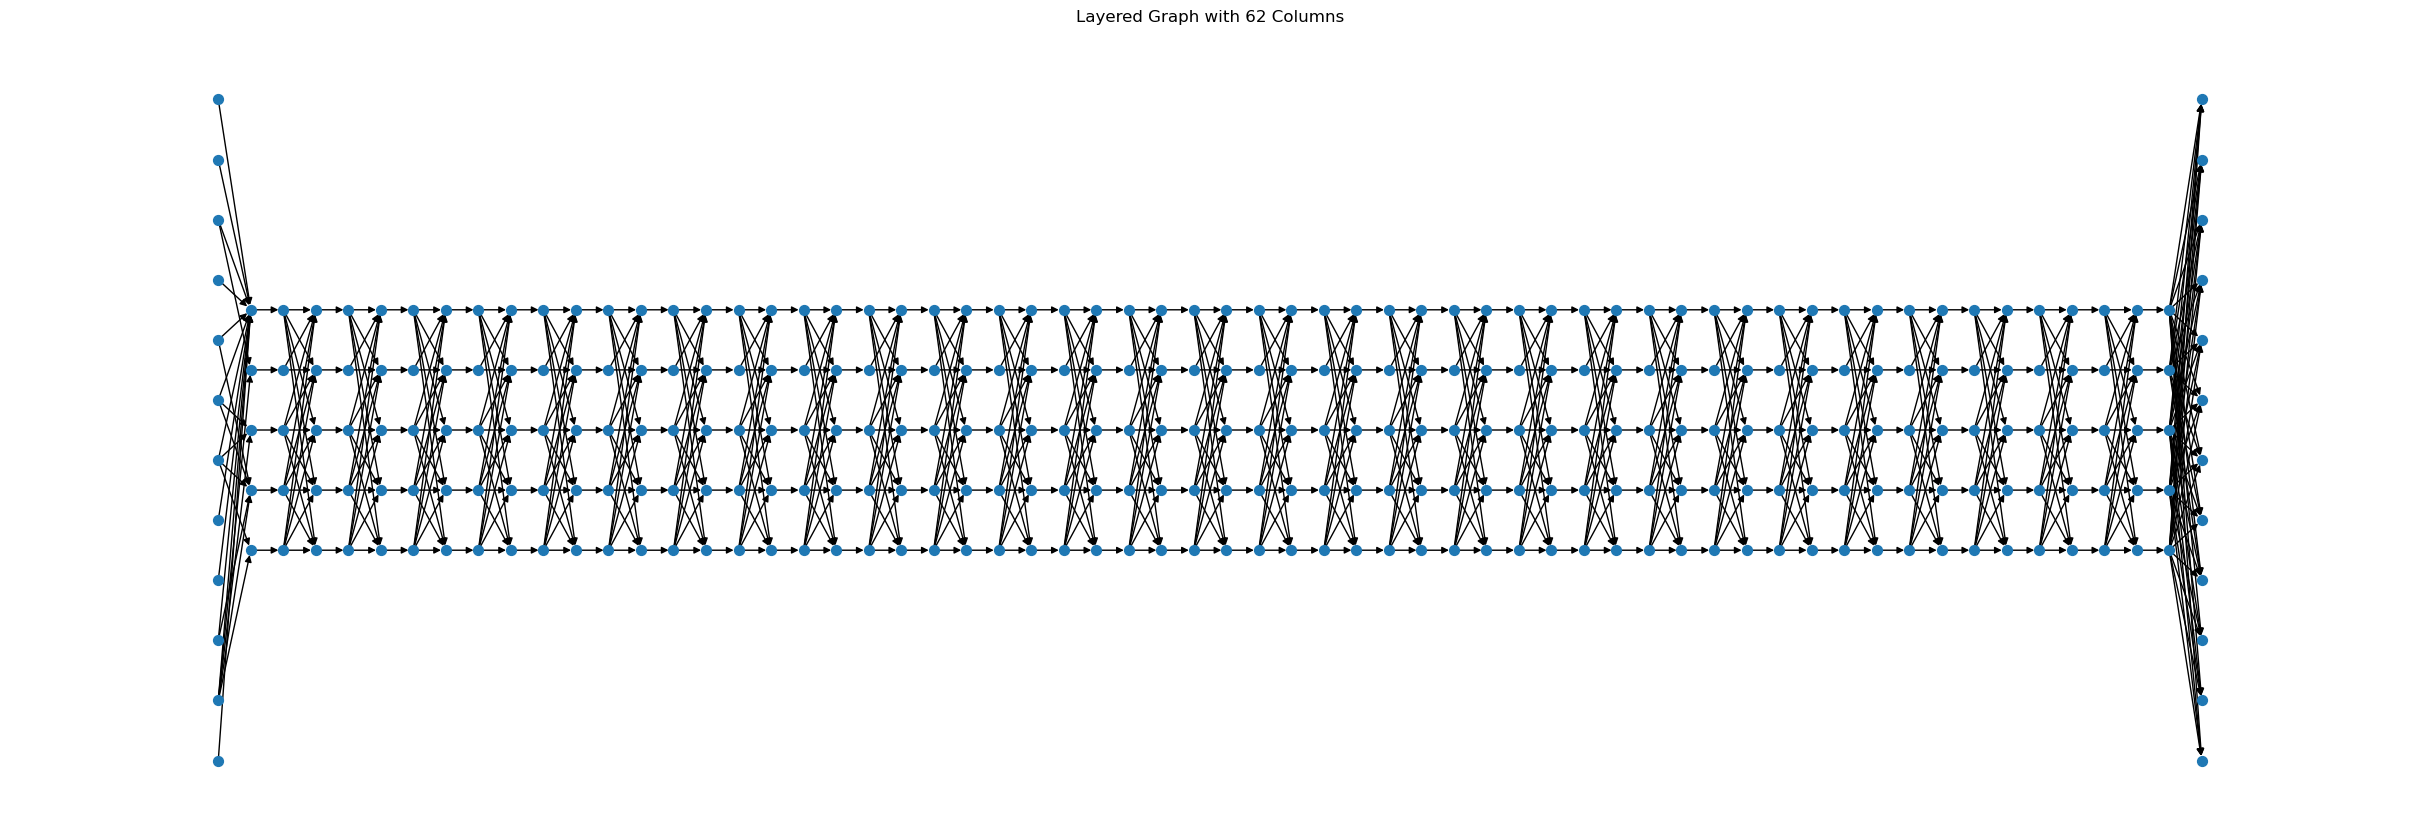

In [52]:
import networkx as nx
import matplotlib.pyplot as plt

# === Parameters ===
num_columns = n_days * 2 + 2
nodes_in_first_last = n_workers
nodes_in_middle = n_shifts + 1

# Define how many nodes are in each column
nodes_per_column = [nodes_in_first_last] + [nodes_in_middle] * (num_columns - 2) + [nodes_in_first_last]

# === Create Graph ===
G = nx.DiGraph()
positions = {}  # to store node positions for layout

# === Create Nodes and Positions ===
for col in range(num_columns):
    count = nodes_per_column[col]
    for row in range(count):
        node = f"{col}-{row}"
        # Center vertically
        y = row - (count - 1) / 2
        positions[node] = (col, y)
        G.add_node(node)

# === Add Edges between adjacent columns ===
for col in range(num_columns - 1):
    curr_nodes = [f"{col}-{i}" for i in range(nodes_per_column[col])]
    next_nodes = [f"{col+1}-{j}" for j in range(nodes_per_column[col+1])]
    
    for i,src in enumerate(curr_nodes):
        for j, tgt in enumerate(next_nodes):
            if col == 0:
                if j == len(next_nodes) - 1:
                    G.add_edge(src, tgt)  
                elif int(df.iloc[j,i+2]) < 2:
                    G.add_edge(src, tgt)
            elif col == num_columns - 1:
                if i == len(next_nodes) - 1:
                    G.add_edge(src, tgt)
                elif int(df.iloc[df.shape[0]-5+i,j+2]) < 2:
                    G.add_edge(src, tgt)
            elif col % 2 == 0:
                if not (i == n_shifts-1 and j < n_shifts-1):
                    G.add_edge(src, tgt)
            elif col % 2 == 1:
                if i == len(next_nodes) - 1:
                    G.add_edge(src, next_nodes[i])
                else:
                    G.add_edge(src, next_nodes[i], capacity=1)

# === Draw the Graph ===
plt.figure(figsize=(24, 8))
nx.draw(G, pos=positions, with_labels=False, node_size=50, arrows=True)
plt.title("Layered Graph with 62 Columns")
plt.axis("off")
plt.show()


In [ ]:
first_nodes = [f"{0}-{i}" for i in range(nodes_per_column[0])]
last_nodes = [f"{num_columns - 1}-{i}" for i in range(nodes_per_column[num_columns - 1])]

commodities = {
    df.columns[i + 2]: {
        "source": first_nodes[i],
        "sink": last_nodes[i],
        "demand": 1
    }
    for i in range(df.shape[1] - 2)
}

commodities

In [ ]:
edge_costs = {}

first_nodes = [f"{0}-{j}" for j in range(nodes_per_column[0])]
last_nodes = [f"{1}-{j}" for j in range(nodes_per_column[1])]
for j,src in enumerate(first_nodes):
        for l, tgt in enumerate(last_nodes[:-1]):
            for k in commodities:
                ind = df.columns.get_loc(k) - 2
                edge_costs[(k, src, tgt)] = int(df.iloc[l, ind + 2])

for i in range(1, n_days):
    first_nodes = [f"{i * 2}-{j}" for j in range(nodes_per_column[i * 2 + 1])]
    last_nodes = [f"{i * 2 + 1}-{j}" for j in range(nodes_per_column[i * 2 + 2])]
    for j,src in enumerate(first_nodes):
        for l, tgt in enumerate(last_nodes[:-1]):
            for k in commodities:
                ind = df.columns.get_loc(k) - 2
                edge_costs[(k, src, tgt)] = int(df.iloc[i * 4 + l, ind + 2])

edge_costs

In [55]:
shift_hours = [8, 6, 8, 12]

In [35]:
import pulp
import math

# 1) Create the LP problem
prob = pulp.LpProblem("MinCost_MultiCommodityFlow", pulp.LpMinimize)

# 2) Create a flow variable for every (commodity, edge) pair
flow = {}
for k in commodities:
    for u, v in G.edges():
        var = pulp.LpVariable(f"f_{k}_{u}_{v}", cat='Binary')
        flow[(k, u, v)] = var

# 3) Objective: minimize total cost (use 0 if cost missing)
prob += pulp.lpSum(
    flow[(k, u, v)] * edge_costs.get((k, u, v), 0)
    for (k, u, v) in flow
), "Total_Cost"

# 4) Capacity constraints on each edge (shared by all commodities)
for u, v, attr in G.edges(data=True):
    cap = attr.get("capacity", None)
    if cap is not None:
        prob += (pulp.lpSum(flow.get((k,u,v)) for k in commodities) <= cap), f"Cap_{u}_{v}"

# 5) Flow‐conservation for each commodity at each node
for k, data in commodities.items():
    s = data["source"]
    t = data["sink"]
    d = data["demand"]
    for node in G.nodes():
        inflow = pulp.lpSum(flow[(k, u, node)] for u in G.predecessors(node) if (k, u, node) in flow)
        outflow = pulp.lpSum(flow[(k, node, v)] for v in G.successors(node) if (k, node, v) in flow)
        if node == s:
            prob += (outflow - inflow == d), f"FlowCons_src_{k}_{node}"
        elif node == t:
            prob += (inflow - outflow == d), f"FlowCons_sink_{k}_{node}"
        else:
            prob += (inflow == outflow), f"FlowCons_mid_{k}_{node}"

# 5+1) Weekly and consecutive minimum shifts and rests per person
for k in commodities:
    for i in range(math.floor(n_days/7)):
            n_workdays_week = pulp.lpSum(
                pulp.lpSum(
                    flow[(k, f'{((i * 7) + j) * 2 + 1}-{l}', f'{((i * 7) + j) * 2 + 2}-{l}')] for l in range(n_shifts)
                ) for j in range(7)
            )
            n_restdays_week = pulp.lpSum(
                flow[(k, f'{((i * 7) + j) * 2 + 1}-{n_shifts}', f'{((i * 7) + j) * 2 + 2}-{n_shifts}')] for j in range(7)
            )
            ind = df.columns.get_loc(k) - 2
            if sum([min(df.iloc[i * 7 + j * 4: i * 7 + j * 4 + 3,ind + 2]) for j in range(7)]) <= 2:
                prob += n_workdays_week >= 2, f"WeeklyMinWork_{k}_week_{i}"
            prob += n_restdays_week >= 2, f"WeeklyMinRest_{k}_week_{i}"
    for i in range(n_days-5):
        n_cons_work_6_days = pulp.lpSum(
            pulp.lpSum(
                flow[(k, f'{(i + j) * 2 + 1}-{l}', f'{(i + j) * 2 + 2}-{l}')] for l in range(n_shifts)
            ) for j in range(6)
        )
        prob += n_cons_work_6_days <= 5, f"WorkDays_{k}_days_{i}_{i+5}"

# 5+2) Total working hours in planning interval
for k in commodities:
    ind = df.columns.get_loc(k) - 2
    min_total_hours = df.iloc[df.shape[0] - 2, ind + 2]
    max_total_hours = df.iloc[df.shape[0] - 1, ind + 2]
    total_hours = pulp.lpSum(
        pulp.lpSum(
            flow[(k, f'{i * 2 + 1}-{j}', f'{i * 2 + 2}-{j}')] * shift_hours[j] for j in range(n_shifts)
        ) for i in range(n_days)
    )
    prob += total_hours >= min_total_hours, f"MinTotalHours_{k}"
    prob += total_hours <= max_total_hours, f"MaxTotalHours_{k}"
    

# 6) Solve with the default CBC solver (or change to 'GUROBI', 'CPLEX', etc.)
prob.solve(pulp.PULP_CBC_CMD(msg=True))

# 7) Output the results
print(f"Status: {pulp.LpStatus[prob.status]}")
print(f"Objective (total cost): {pulp.value(prob.objective):.3f}\n")
print("Flows (only positive):")
for (k, u, v), var in flow.items():
    if var.varValue and var.varValue > 1e-6:
        cost = edge_costs.get((k, u, v), 0)
        print(f"  {k:>6} | {u} -> {v} : {var.varValue:.3f}  (unit cost={cost})")

Status: Optimal
Objective (total cost): 0.000

Flows (only positive):
    Kata | 0-0 -> 1-4 : 1.000  (unit cost=0)
    Kata | 1-4 -> 2-4 : 1.000  (unit cost=0)
    Kata | 2-4 -> 3-0 : 1.000  (unit cost=0)
    Kata | 3-0 -> 4-0 : 1.000  (unit cost=0)
    Kata | 4-0 -> 5-4 : 1.000  (unit cost=0)
    Kata | 5-4 -> 6-4 : 1.000  (unit cost=0)
    Kata | 6-4 -> 7-2 : 1.000  (unit cost=0)
    Kata | 7-2 -> 8-2 : 1.000  (unit cost=0)
    Kata | 8-2 -> 9-4 : 1.000  (unit cost=0)
    Kata | 9-4 -> 10-4 : 1.000  (unit cost=0)
    Kata | 10-4 -> 11-4 : 1.000  (unit cost=0)
    Kata | 11-4 -> 12-4 : 1.000  (unit cost=0)
    Kata | 12-4 -> 13-4 : 1.000  (unit cost=0)
    Kata | 13-4 -> 14-4 : 1.000  (unit cost=0)
    Kata | 14-4 -> 15-2 : 1.000  (unit cost=0)
    Kata | 15-2 -> 16-2 : 1.000  (unit cost=0)
    Kata | 16-2 -> 17-0 : 1.000  (unit cost=0)
    Kata | 17-0 -> 18-0 : 1.000  (unit cost=0)
    Kata | 18-0 -> 19-4 : 1.000  (unit cost=0)
    Kata | 19-4 -> 20-4 : 1.000  (unit cost=0)
    Kata 

In [56]:
n_preferences = {}
for k in commodities:
    ind = df.columns.get_loc(k) - 2
    n_preferences[k] = df.iloc[ : -2, ind + 2].sum() % 1000 + 1

In [57]:
import pulp
import math

# 1) Create the LP problem
prob = pulp.LpProblem("MinCost_MultiCommodityFlow", pulp.LpMinimize)

# 2) Create a flow variable for every (commodity, edge) pair
flow = {}
for k in commodities:
    for u, v in G.edges():
        var = pulp.LpVariable(f"f_{k}_{u}_{v}", cat='Binary')
        flow[(k, u, v)] = var

# 3) Objective: minimize total cost (use 0 if cost missing)
prob += pulp.lpSum(
    flow[(k, u, v)] * edge_costs.get((k, u, v), 0)
    for (k, u, v) in flow
) + pulp.lpSum(
        pulp.lpSum(
            flow[(k, f'{i * 2 + 1}-{n_shifts}', f'{i * 2 + 2}-{n_shifts}')] for k in commodities
        ) - n_workers + n_shifts for i in range(n_days)
) * 100 
+ pulp.lpSum(
    pulp.lpSum(
        flow[(k, u, v)] * edge_costs.get((k, u, v), 0) for u, v in G.edges()
    ) * (n_preferences[k] ^ (-1)) for k in commodities
), "Total_Cost"

# 4) Capacity constraints on each edge (shared by all commodities)
for u, v, attr in G.edges(data=True):
    cap = attr.get("capacity", None)
    if cap is not None:
        prob += (pulp.lpSum(flow.get((k,u,v)) for k in commodities) <= cap), f"Cap_{u}_{v}"

# 5) Flow‐conservation for each commodity at each node
for k, data in commodities.items():
    s = data["source"]
    t = data["sink"]
    d = data["demand"]
    for node in G.nodes():
        inflow = pulp.lpSum(flow[(k, u, node)] for u in G.predecessors(node) if (k, u, node) in flow)
        outflow = pulp.lpSum(flow[(k, node, v)] for v in G.successors(node) if (k, node, v) in flow)
        if node == s:
            prob += (outflow - inflow == d), f"FlowCons_src_{k}_{node}"
        elif node == t:
            prob += (inflow - outflow == d), f"FlowCons_sink_{k}_{node}"
        else:
            prob += (inflow == outflow), f"FlowCons_mid_{k}_{node}"

# 5+1) Weekly and consecutive minimum shifts and rests per person
for k in commodities:
    for i in range(math.floor(n_days/7)):
            n_workdays_week = pulp.lpSum(
                pulp.lpSum(
                    flow[(k, f'{((i * 7) + j) * 2 + 1}-{l}', f'{((i * 7) + j) * 2 + 2}-{l}')] for l in range(n_shifts)
                ) for j in range(7)
            )
            n_restdays_week = pulp.lpSum(
                flow[(k, f'{((i * 7) + j) * 2 + 1}-{n_shifts}', f'{((i * 7) + j) * 2 + 2}-{n_shifts}')] for j in range(7)
            )
            ind = df.columns.get_loc(k) - 2
            if sum([min(df.iloc[i * 7 + j * 4: i * 7 + j * 4 + 3,ind + 2]) for j in range(7)]) <= 2:
                prob += n_workdays_week >= 2, f"WeeklyMinWork_{k}_week_{i}"
            prob += n_restdays_week >= 2, f"WeeklyMinRest_{k}_week_{i}"
    for i in range(n_days-5):
        n_cons_work_6_days = pulp.lpSum(
            pulp.lpSum(
                flow[(k, f'{(i + j) * 2 + 1}-{l}', f'{(i + j) * 2 + 2}-{l}')] for l in range(n_shifts)
            ) for j in range(6)
        )
        prob += n_cons_work_6_days <= 5, f"WorkDays_{k}_days_{i}_{i+5}"

# 5+2) Total working hours in planning interval
for k in commodities:
    ind = df.columns.get_loc(k) - 2
    min_total_hours = df.iloc[df.shape[0] - 2, ind + 2]
    max_total_hours = df.iloc[df.shape[0] - 1, ind + 2]
    total_hours = pulp.lpSum(
        pulp.lpSum(
            flow[(k, f'{i * 2 + 1}-{j}', f'{i * 2 + 2}-{j}')] * shift_hours[j] for j in range(n_shifts)
        ) for i in range(n_days)
    )
    prob += total_hours >= min_total_hours, f"MinTotalHours_{k}"
    prob += total_hours <= max_total_hours, f"MaxTotalHours_{k}"
    

# 6) Solve with the default CBC solver (or change to 'GUROBI', 'CPLEX', etc.)
prob.solve(pulp.PULP_CBC_CMD(msg=True))

# 7) Output the results
print(f"Status: {pulp.LpStatus[prob.status]}")
print(f"Objective (total cost): {pulp.value(prob.objective):.3f}\n")
print("Flows (only positive):")
for (k, u, v), var in flow.items():
    if var.varValue and var.varValue > 1e-6:
        cost = edge_costs.get((k, u, v), 0)
        print(f"  {k:>6} | {u} -> {v} : {var.varValue:.3f}  (unit cost={cost})")

Status: Optimal
Objective (total cost): 1.000

Flows (only positive):
   Kinga | 0-0 -> 1-4 : 1.000  (unit cost=0)
   Kinga | 1-4 -> 2-4 : 1.000  (unit cost=0)
   Kinga | 2-4 -> 3-4 : 1.000  (unit cost=0)
   Kinga | 3-4 -> 4-4 : 1.000  (unit cost=0)
   Kinga | 4-4 -> 5-4 : 1.000  (unit cost=0)
   Kinga | 5-4 -> 6-4 : 1.000  (unit cost=0)
   Kinga | 6-4 -> 7-4 : 1.000  (unit cost=0)
   Kinga | 7-4 -> 8-4 : 1.000  (unit cost=0)
   Kinga | 8-4 -> 9-4 : 1.000  (unit cost=0)
   Kinga | 9-4 -> 10-4 : 1.000  (unit cost=0)
   Kinga | 10-4 -> 11-4 : 1.000  (unit cost=0)
   Kinga | 11-4 -> 12-4 : 1.000  (unit cost=0)
   Kinga | 12-4 -> 13-0 : 1.000  (unit cost=0)
   Kinga | 13-0 -> 14-0 : 1.000  (unit cost=0)
   Kinga | 14-0 -> 15-4 : 1.000  (unit cost=0)
   Kinga | 15-4 -> 16-4 : 1.000  (unit cost=0)
   Kinga | 16-4 -> 17-4 : 1.000  (unit cost=0)
   Kinga | 17-4 -> 18-4 : 1.000  (unit cost=0)
   Kinga | 18-4 -> 19-2 : 1.000  (unit cost=0)
   Kinga | 19-2 -> 20-2 : 1.000  (unit cost=0)
   Kinga 

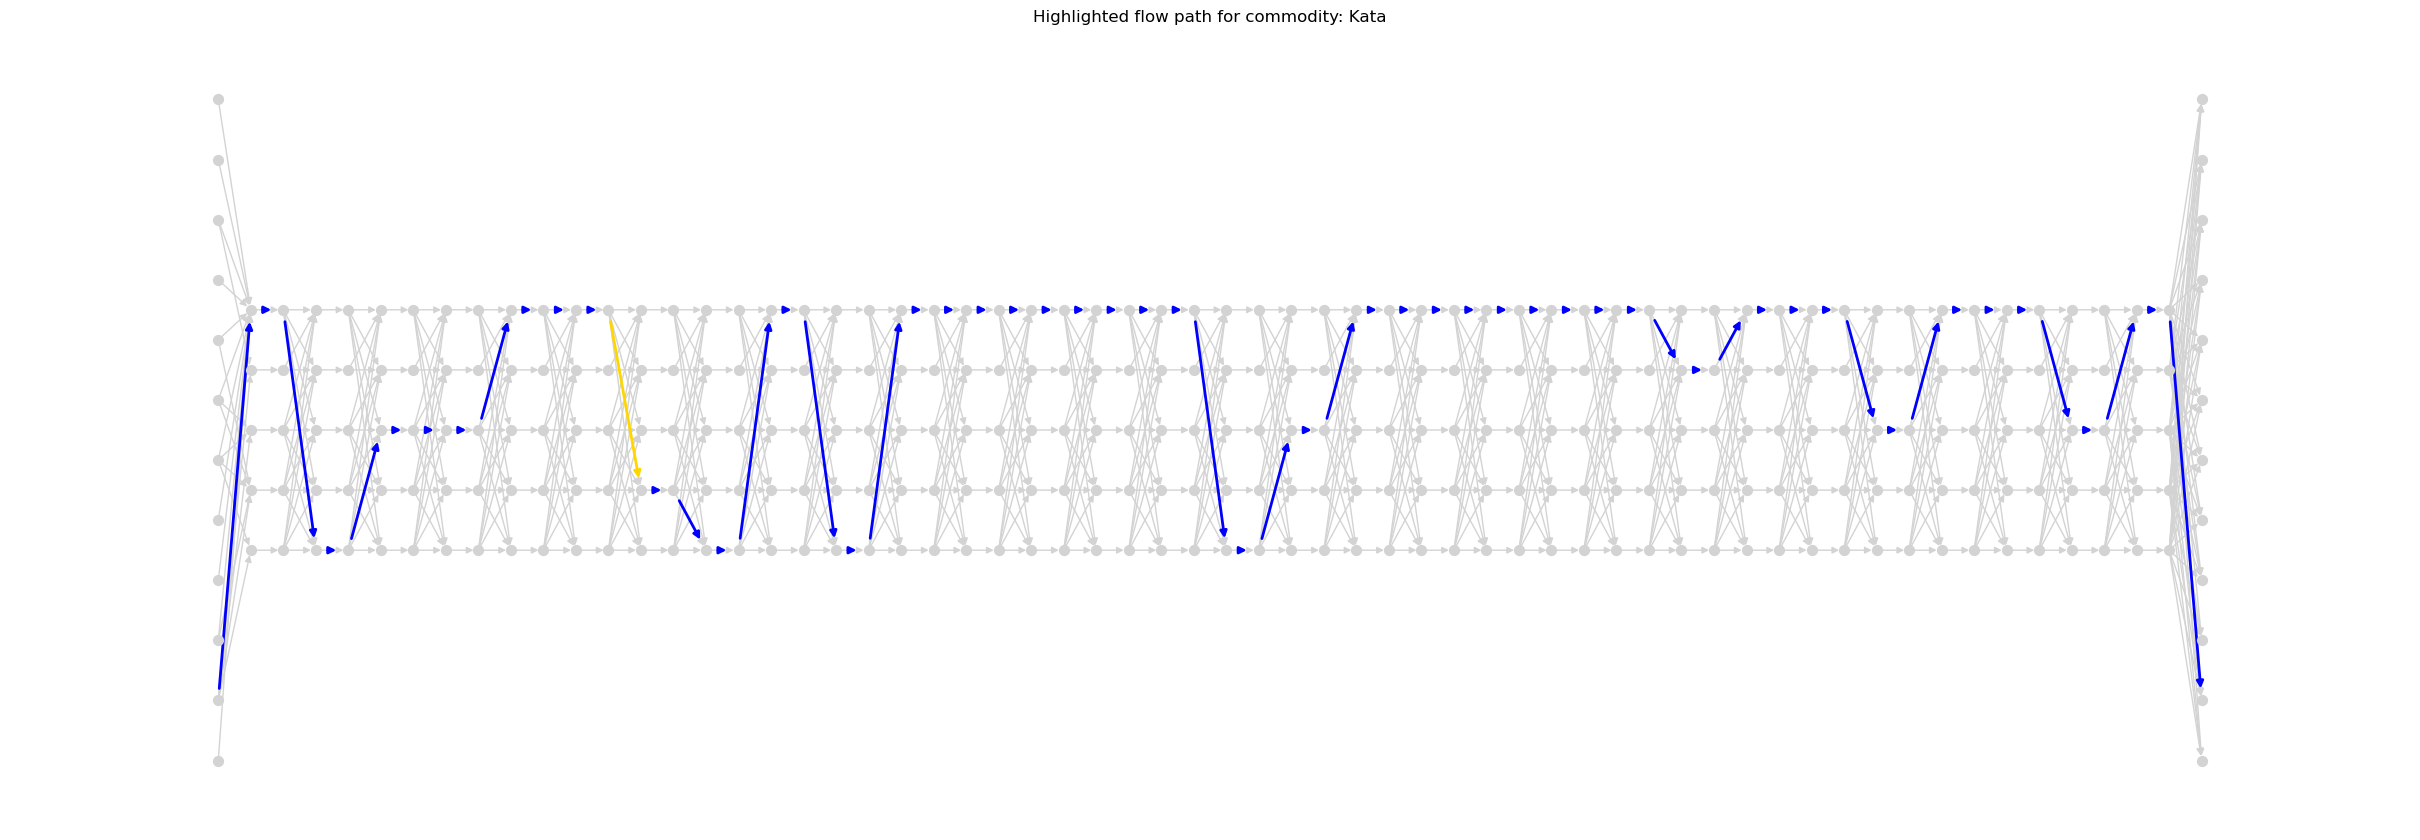

In [58]:
import matplotlib.pyplot as plt
import networkx as nx

# Select the first commodity (e.g., 'Kata')
first_commodity = list(commodities.keys())[1]

# Collect edges with positive flow for this commodity
active_edges = []
edge_colors = []

for (k, u, v), var in flow.items():
    if k == first_commodity and var.varValue and var.varValue > 1e-6:
        active_edges.append((u, v))
        cost = edge_costs.get((k, u, v), 0)
        if cost == 1000:
            edge_colors.append('red')
        elif cost == 1:
            edge_colors.append('gold')
        else:
            edge_colors.append('blue')

# Create a position layout for visualization
plt.figure(figsize=(24, 8))
nx.draw(G, pos=positions, with_labels=False, node_color='lightgray', edge_color='lightgray', node_size=50, arrows=True)

# Draw the active path with a strong color
nx.draw_networkx_edges(
    G,
    pos=positions,
    edgelist=active_edges,
    edge_color=edge_colors,
    width=2
)

plt.title(f"Highlighted flow path for commodity: {first_commodity}")
plt.show()

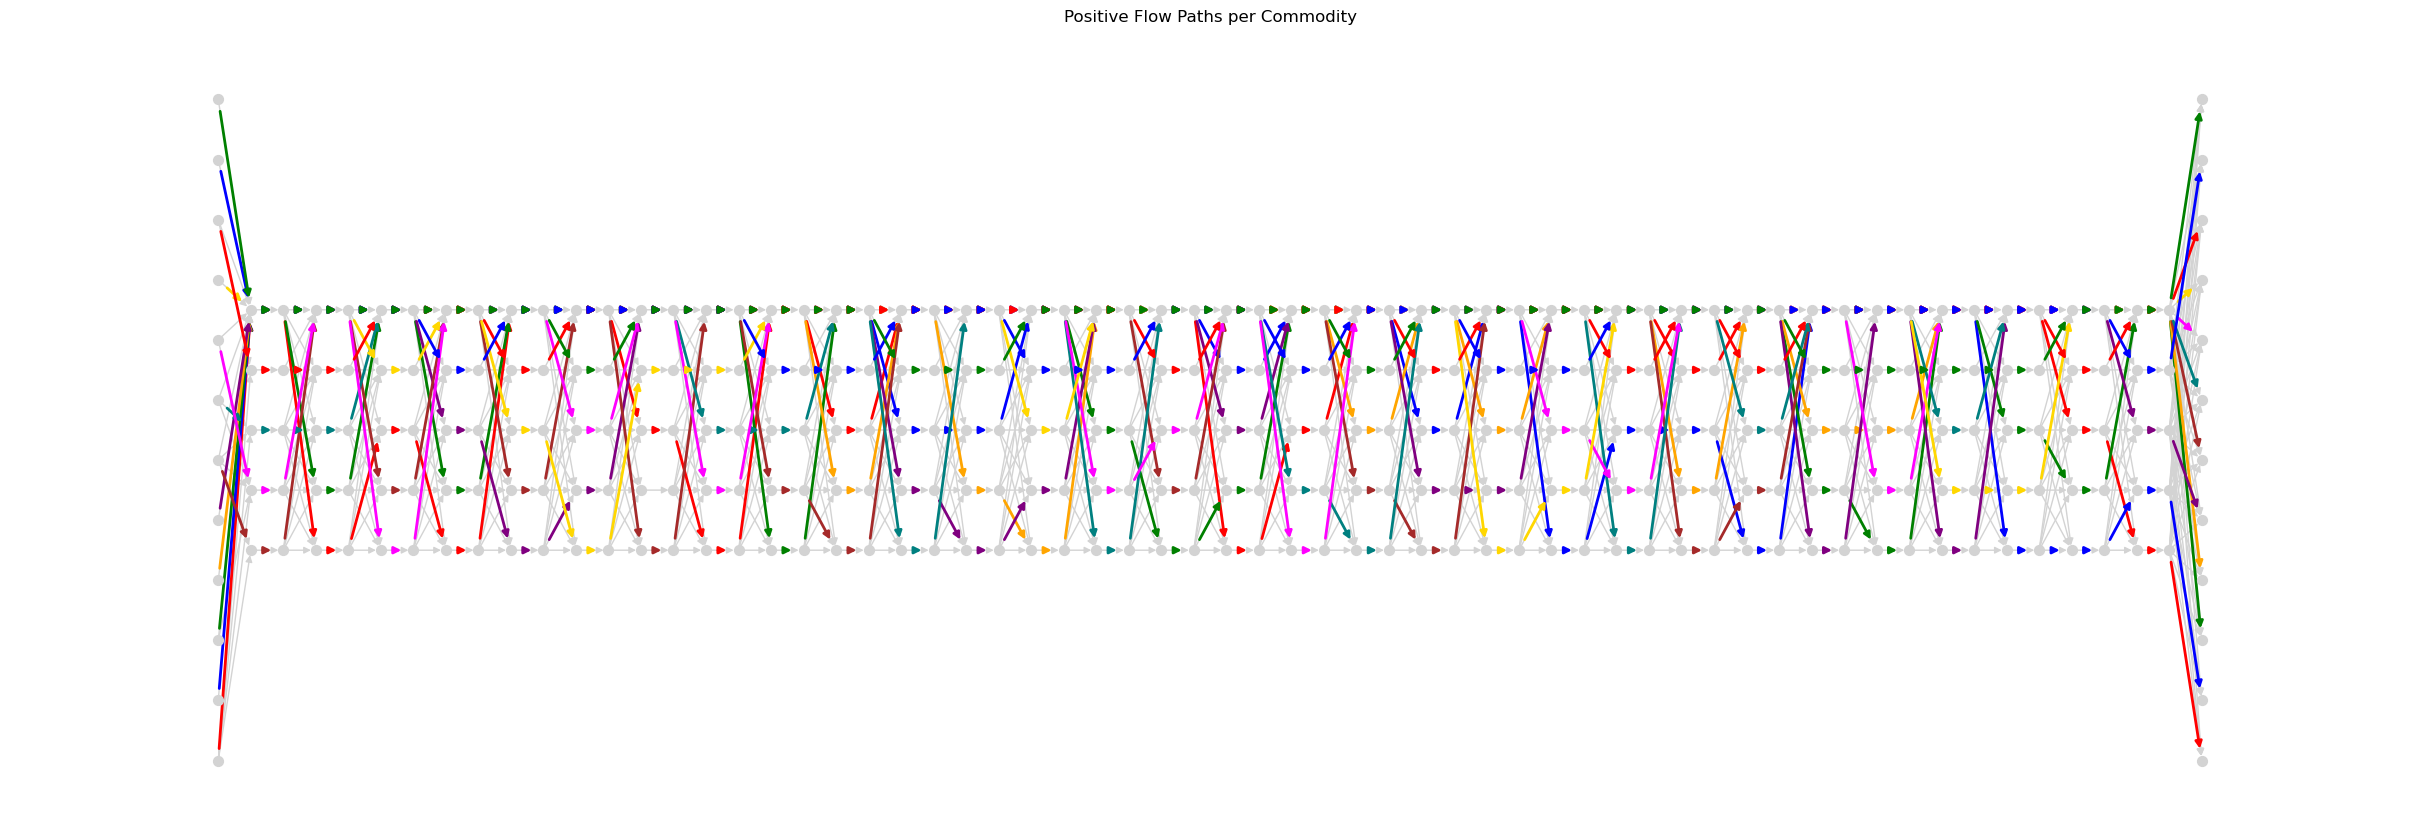

In [48]:
# Create a position layout for visualization
plt.figure(figsize=(24, 8))
nx.draw(G, pos=positions, with_labels=False, node_color='lightgray', edge_color='lightgray', node_size=50, arrows=True)

import itertools
colors = itertools.cycle(['red', 'blue', 'green', 'orange', 'purple', 'brown', 'teal', 'magenta', 'gold'])

for curr_commodity in list(commodities.keys()):
    # Collect edges with positive flow for this commodity
    active_edges = [
        (u, v) for (k, u, v), var in flow.items()
        if k == curr_commodity and var.varValue and var.varValue > 1e-6
    ]

    # Draw the active path with a strong color
    nx.draw_networkx_edges(G, pos=positions,
        edgelist=active_edges,
        edge_color=next(colors),
        width=2
    )

plt.title("Positive Flow Paths per Commodity")
plt.show()

In [59]:
import pandas as pd

# Assuming n_shifts = 4 and columns map like this:
shift_cols = list(df["Muszak"].unique())

df_sched = pd.DataFrame(columns=["Datum"] + shift_cols)
df_whs = pd.DataFrame(columns=commodities)
df_whs.loc[0, :] = [0] * n_workers

for i in range(n_days):
    df_sched.loc[i, "Datum"] = df["Datum"].iloc[n_shifts * i + 1]
    for l in range(n_shifts):
        for k in commodities:
            edge = (k, f'{i * 2 + 1}-{l}', f'{i * 2 + 2}-{l}')
            if edge in flow and flow[edge].varValue and flow[edge].varValue > 0.5:
                df_sched.loc[i, shift_cols[l]] = k
                df_whs.loc[0, k] += shift_hours[l]
                break  # Only take the first commodity that flows on this shift

df_sched.to_csv('beosztas.csv', index=False, encoding='utf-8')
df_whs.to_csv('oraszamok.csv', index=False, encoding='utf-8')